# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

## Estimates of Location

In [2]:
# Apparently no package has a weighted median function!
def weighted_median(data, weights):
    """
        Args:
          data (list or numpy.array): data
          weights (list or numpy.array): weights
        """
    data, weights = np.array(data).squeeze(), np.array(weights).squeeze()
    s_data, s_weights = map(np.array, zip(*sorted(zip(data, weights))))
    midpoint = 0.5 * sum(s_weights)
    if any(weights > midpoint):
        w_median = (data[weights == np.max(weights)])[0]
    else:
        cs_weights = np.cumsum(s_weights)
        idx = np.where(cs_weights <= midpoint)[0][-1]
    if cs_weights[idx] == midpoint:
        w_median = np.mean(s_data[idx:idx+2])
    else:
        w_median = s_data[idx+1]
    return w_median

In [3]:
df = pd.read_csv('./data/state.csv')

In [4]:
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [5]:
# Calculate the mean
df['Murder.Rate'].mean()

4.066

In [6]:
# Calculate the trimmed mean
stats.trim_mean(df['Murder.Rate'],0.1)

3.9450000000000003

In [7]:
# Calculate the median
df['Murder.Rate'].median()

4.0

In [8]:
print(df['Population'].mean())
print(stats.trim_mean(df['Population'],0.1))
print(df['Population'].median())

6162876.3
4783697.125
4436369.5


In [9]:
np.average(df['Murder.Rate'],weights=df['Population'])

4.445833981123393

In [10]:
weighted_median(df['Murder.Rate'],weights=df['Population'])

4.4

## Note to self: Explore stared functions, zip, map
It's some complicated code to come up with two arrays. Must be why they invented Pandas

In [11]:
s_data, s_weights = map(np.array,zip(*sorted(zip(df['Murder.Rate'],df['Population']))))

In [12]:
s_data

array([ 0.9,  1.6,  1.6,  1.6,  1.8,  1.9,  2. ,  2. ,  2. ,  2.3,  2.3,
        2.4,  2.4,  2.5,  2.7,  2.8,  2.9,  2.9,  3. ,  3.1,  3.1,  3.6,
        3.6,  3.9,  4. ,  4. ,  4.1,  4.4,  4.4,  4.5,  4.7,  4.8,  4.8,
        5. ,  5.1,  5.3,  5.4,  5.6,  5.6,  5.7,  5.7,  5.7,  5.8,  5.8,
        6. ,  6.1,  6.4,  6.6,  8.6, 10.3])

In [13]:
s_weights

array([ 1316470,   625741,  1328361,  5303925,  1360301,  3046355,
        1567582,  3831074,  6547629,   814180,  2763885,  1052567,
        3574097,  6724540,   563626,  5029196,  1826341,  5686986,
         672591,  2853118, 19378102,   989415,  4339367,  8791894,
        1852994, 11536504,  8001024, 25145561, 37253956,  3751351,
        6392017,  2059179, 12702379,  6483802,  9535483, 12830632,
        9883640,   710231,  2915918,  4779736,  6346105,  9687653,
         897934, 18801310,  2700551,  5773552,  4625364,  5988927,
        2967297,  4533372])

## Estimates of Variability

In [14]:
# Find Inter Quartile Range of the state populations
q75, q25 = np.percentile(df['Population'],(75, 25))
iqr = q75 - q25
iqr

4847308.0

In [15]:
# Find standard deviation of populations
import statistics
statistics.stdev(df['Population'])

6848235.347401143

In [16]:
# Mean absolute deviation is built into Pandas
df['Population'].mad()

4450933.356000001

In [17]:
# Figure out how to calculate Median Absolute Deviation (must be a package somewhere - or just write the code)

In [18]:
med = df['Population'].median()
print(med)
print("Median Absolute Deviation:" ,(abs(df['Population'] - med)).median())

4436369.5
Median Absolute Deviation: 2596702.0


## Percentiles and Boxplots

In [19]:
import matplotlib.pyplot as plt
plt.boxplot(df['Murder.Rate'])
plt.show()

<Figure size 640x480 with 1 Axes>

## Histogram

In [28]:
df['Population'].head()

0     4779736
1      710231
2     6392017
3     2915918
4    37253956
Name: Population, dtype: int64

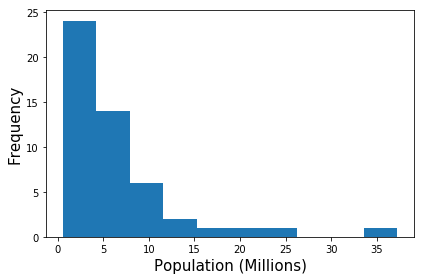

In [70]:
fig, ax = plt.subplots()
ax.hist(df['Population']/1000000, bins=10)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_xlabel('Population (Millions)',fontsize=15)
fig.tight_layout()